# Data

#### Updating data

In [1]:
from utilities import *
from Reuters import *

ROOT_DIR = os.path.dirname(os.path.abspath("__file__"))
PARENT_DIR = os.path.dirname(ROOT_DIR)
source = "Reuters"

In [2]:
data = reutersScraper()

data.to_csv(PARENT_DIR + "/data/" + source + ".csv", index=True)

-> Last page scraped: 2
-> Scraper |████████████████████████████████████████| 2/2 [100%] in 4.6s (0.44/s)                                       
-> 31 URLs fetched successfully!
-> Scraper |██████████████████████████████████▉⚠︎    | (!) 27/31 [87%] in 29.8s (0.91/s)                                 
-> New data fetched successfully!


In [3]:
data.head(1)

,URL,Title,Text
Date,,,
2022-07-22,https://www.reuters.com/article/ukraine-crisis...,"Nord Stream flows stable, Eastbound Yamal flow...",Physical flows of Russian gas through Nord St...


#### LDA topic identification

In [4]:
doc_topic, topic_word, vocabulary = learn_topics(data, topicnum=30, vocabsize=10000, num_iter=2000) 

INFO:lda:n_documents: 11537
INFO:lda:vocab_size: 10000
INFO:lda:n_words: 2171212
INFO:lda:n_topics: 30
INFO:lda:n_iter: 2000
INFO:lda:<0> log likelihood: -25988175
INFO:lda:<100> log likelihood: -17820707
INFO:lda:<200> log likelihood: -17694176
INFO:lda:<300> log likelihood: -17658884
INFO:lda:<400> log likelihood: -17632288
INFO:lda:<500> log likelihood: -17618239
INFO:lda:<600> log likelihood: -17613076
INFO:lda:<700> log likelihood: -17606770
INFO:lda:<800> log likelihood: -17610814
INFO:lda:<900> log likelihood: -17605255
INFO:lda:<1000> log likelihood: -17602692
INFO:lda:<1100> log likelihood: -17605549
INFO:lda:<1200> log likelihood: -17602125
INFO:lda:<1300> log likelihood: -17604305
INFO:lda:<1400> log likelihood: -17596584
INFO:lda:<1500> log likelihood: -17593702
INFO:lda:<1600> log likelihood: -17599177
INFO:lda:<1700> log likelihood: -17590723
INFO:lda:<1800> log likelihood: -17596631
INFO:lda:<1900> log likelihood: -17591946
INFO:lda:<1999> log likelihood: -17592817


In [5]:
topics = []
for i in range(len(data)):
    topics.append(doc_topic[i].argmax())

In [6]:
for i in range(10):
    print(f"{data.iloc[i][1]} TOPIC: {doc_topic[i].argmax()}")

Nord Stream flows stable, Eastbound Yamal flows decline TOPIC: 7
Ukraine and Russia: What you need to know right now TOPIC: 23
Kremlin rejects report Nord Stream turbine is stuck in transit TOPIC: 7
Uniper's Finnish parent Fortum agrees to Germany's bailout deal - sources TOPIC: 7
Analysis: Ukraine war rekindles Europe's demand for African oil and gas TOPIC: 5
Rotterdam port says coal, LNG surged in H1, Russian imports fell TOPIC: 5
Ukraine-Russia grains deal to be signed in Turkey this afternoon - U.N. TOPIC: 3
French lawmakers back Macron's promised inflation relief TOPIC: 20
Belarus appoints new envoy to Moscow TOPIC: 6
China criticises Japan's defence white paper for making "accusations" TOPIC: 26


In [7]:
for i, topic_dist in enumerate(topic_word):
    topic_words = np.array(vocabulary)[np.argsort(topic_dist)][:-8:-1]
    print("Topic {}: {}".format(i, " ".join(topic_words)))


Topic 0: said mariupol city civilians ukrainian ukraine russian
Topic 1: said it we but told that time
Topic 2: turkey nato said finland sweden turkish russia
Topic 3: russia the said ukraine russian war crimes
Topic 4: russia said company companies the ukraine russian
Topic 5: oil russian russia crude million said the
Topic 6: ukraine russia said russian moscow troops nato
Topic 7: gas energy said europe germany pipeline russian
Topic 8: russia putin russian moscow said president kremlin
Topic 9: biden said united president states the ukraine
Topic 10: ukraine russia said ukrainian zelenskiy war russian
Topic 11: said ukraine people refugees poland border million
Topic 12: said the russian media russia court navalny
Topic 13: sanctions russian russia the said banks financial
Topic 14: the year inflation prices said ukraine growth
Topic 15: said covid the health vaccine sputnik million
Topic 16: russia russian rouble the bank said sanctions
Topic 17: said russian russia iran the foreig

In [8]:
save_topicmodel(doc_topic, topic_word, vocabulary, source)

('/Users/r2/Code/ukraine-media/results/ReutersTopicMixtures.txt',
 '/Users/r2/Code/ukraine-media/results/ReutersTopics.txt',
 '/Users/r2/Code/ukraine-media/results/ReutersVocab.txt')

In [9]:
period = 7
novelties, transiences, resonances = novelty_transience_resonance(doc_topic, period)

for index in range(0,period):
    transiences.insert(0, 0)
    transiences.append(0)
    novelties.insert(0, 0)
    novelties.append(0)
    resonances.insert(0, 0)
    resonances.append(0)

save_novel_trans_reson(novelties, transiences, resonances, source)

/Users/r2/Code/ukraine-media/scrapers/utilities.py:142: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  np.savetxt(outpath, np.vstack(zip(novelties, transiences, resonances)))


In [10]:
ntr_data = data
ntr_data['Novelty'] = novelties
ntr_data['Transience'] = novelties
ntr_data['Resonance'] = resonances
ntr_data['Topic'] = topics

ntr_data.to_csv(PARENT_DIR + "/data/"+ source +"_ntr.csv")
ntr_data.head(5)

,URL,Title,Text,Novelty,Transience,Resonance,Topic
Date,,,,,,,
2022-07-22,https://www.reuters.com/article/ukraine-crisis...,"Nord Stream flows stable, Eastbound Yamal flow...",Physical flows of Russian gas through Nord St...,0.0,0.0,0.0,7
2022-07-22,https://www.reuters.com/article/us-ukraine-cri...,Ukraine and Russia: What you need to know righ...,Russia and Ukraine will sign a deal on Friday...,0.0,0.0,0.0,23
2022-07-22,https://www.reuters.com/article/us-ukraine-cri...,Kremlin rejects report Nord Stream turbine is ...,The Kremlin on Friday rejected a report that ...,0.0,0.0,0.0,7
2022-07-22,https://www.reuters.com/article/ukraine-crisis...,Uniper's Finnish parent Fortum agrees to Germa...,"Uniper (UN01.DE), Finnish parent Fortum (FORT...",0.0,0.0,0.0,7
2022-07-22,https://www.reuters.com/article/ukraine-crisis...,Analysis: Ukraine war rekindles Europe's deman...,Europe's thirst for oil and gas to replace sa...,0.0,0.0,0.0,5


In [11]:
ntr_data.describe()

,Novelty,Transience,Resonance,Topic
count,11537.000000,11537.000000,11537.000000,11537.000000
mean,5.582929,5.582929,-0.012684,14.467886
std,1.131551,1.131551,1.010007,8.681480
min,0.000000,0.000000,-4.456502,0.000000
25%,4.886050,4.886050,-0.648583,7.000000
50%,5.592300,5.592300,-0.019871,13.000000
75%,6.308249,6.308249,0.628524,22.000000
max,9.652024,9.652024,5.530023,29.000000


# Plots

In [12]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import datetime as dt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

In [13]:
ntr_data = pd.read_csv(PARENT_DIR + "/data/"+ source +"_ntr.csv", parse_dates=['Date'], index_col= ['Date'])
ntr_data.head()

,URL,Title,Text,Novelty,Transience,Resonance,Topic
Date,,,,,,,
2022-07-22,https://www.reuters.com/article/ukraine-crisis...,"Nord Stream flows stable, Eastbound Yamal flow...",Physical flows of Russian gas through Nord St...,0.0,0.0,0.0,7
2022-07-22,https://www.reuters.com/article/us-ukraine-cri...,Ukraine and Russia: What you need to know righ...,Russia and Ukraine will sign a deal on Friday...,0.0,0.0,0.0,23
2022-07-22,https://www.reuters.com/article/us-ukraine-cri...,Kremlin rejects report Nord Stream turbine is ...,The Kremlin on Friday rejected a report that ...,0.0,0.0,0.0,7
2022-07-22,https://www.reuters.com/article/ukraine-crisis...,Uniper's Finnish parent Fortum agrees to Germa...,"Uniper (UN01.DE), Finnish parent Fortum (FORT...",0.0,0.0,0.0,7
2022-07-22,https://www.reuters.com/article/ukraine-crisis...,Analysis: Ukraine war rekindles Europe's deman...,Europe's thirst for oil and gas to replace sa...,0.0,0.0,0.0,5


In [14]:
davg = ntr_data.resample('D').mean()
davg.head()

,Novelty,Transience,Resonance,Topic
Date,,,,
2021-04-09,1.190580,1.190580,-0.269025,9.600000
2021-04-10,4.732393,4.732393,-0.065675,8.000000
2021-04-11,4.481602,4.481602,-0.510532,13.666667
2021-04-12,5.704246,5.704246,0.629623,12.428571
2021-04-13,3.584650,3.584650,-0.451782,8.857143


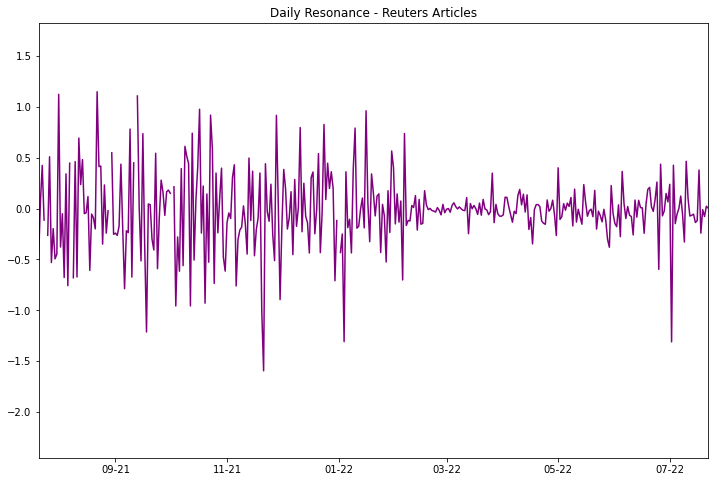

In [15]:
fig, ax = plt.subplots(figsize=(12, 8))

left = dt.date(2021, 7, 21)
right = dt.date.today()

ax.plot(davg.index.values,
       davg['Resonance'],
       color='purple',
       #linewidths=0
       )

ax.set(
       #xlabel="Date",
       #ylabel="Resonance",
       title="Daily Resonance - Reuters Articles")

date_form = DateFormatter("%m-%y")
ax.xaxis.set_major_formatter(date_form)
ax.set_xbound(left, right)

In [16]:
ntr_data2 = pd.read_csv(PARENT_DIR + "/data/Guardian_ntr.csv", parse_dates=['Date'], index_col= ['Date'])
ntr_data2.head()
#print(len(ntr_data))
davg2 = ntr_data2.resample('D').mean()
davg2.head()

,Novelty,Transience,Resonance,Topic
Date,,,,
2021-02-10,0.0,0.0,0.0,0.0
2021-02-11,NaN,NaN,NaN,NaN
2021-02-12,NaN,NaN,NaN,NaN
2021-02-13,NaN,NaN,NaN,NaN
2021-02-14,NaN,NaN,NaN,NaN


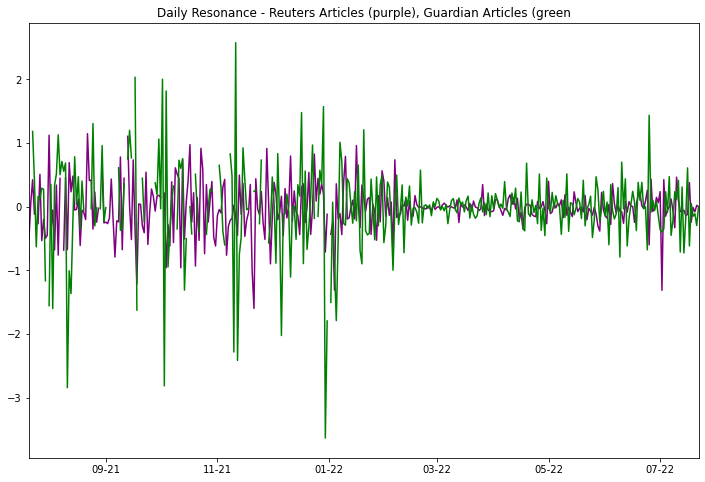

In [18]:
fig, ax = plt.subplots(figsize=(12, 8))

left = dt.date(2021, 7, 21)
right = dt.date.today()

ax.plot(davg.index.values,
       davg['Resonance'],
       color='purple',
       #linewidths=0
       )

ax.plot(davg2.index.values,
       davg2['Resonance'],
       color='green',
       #linewidths=0
       )

ax.set(
       #xlabel="Date",
       #ylabel="Resonance",
       title="Daily Resonance - Reuters Articles (purple), Guardian Articles (green")

date_form = DateFormatter("%m-%y")
ax.xaxis.set_major_formatter(date_form)
ax.set_xbound(left, right)